NameError: name 'X_train' is not defined

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load features
train_df = pd.read_parquet(r"C:\Users\hp\Downloads\crop_features.parquet")
train_df.head()

,label,mean_r,mean_g,mean_b,std_r,std_g,std_b,contrast,correlation,energy,homogeneity
0,Apple___Apple_scab,122.926727,138.870865,101.619614,78.519502,66.615772,83.514542,111.788480,0.988896,0.016174,0.233676
1,Apple___Apple_scab,115.444275,134.601547,133.722260,66.930721,67.880134,73.568089,237.320052,0.974093,0.012231,0.142493
2,Apple___Apple_scab,123.756287,131.242920,131.898270,76.688321,67.275197,85.716377,111.629013,0.989054,0.015373,0.208925
3,Apple___Apple_scab,118.678513,133.362900,132.454895,74.912786,65.759412,82.696703,110.138940,0.988688,0.013211,0.163847
4,Apple___Apple_scab,123.860748,131.147507,129.159866,74.928762,66.544121,85.988320,110.375965,0.988964,0.015561,0.225125


In [7]:
train_df.columns

Index(['label', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b',
       'contrast', 'correlation', 'energy', 'homogeneity'],
      dtype='object')

In [11]:
# Encode labels
le = LabelEncoder()
train_df['label_encoded'] = le.fit_transform(train_df['label'])

# Features and target
X_train = train_df.drop(['label', 'label_encoded'], axis=1)
y_train = train_df['label_encoded']

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1️⃣ Create PCA-SVM pipeline
pca_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # keep 95% variance
    ('svm', SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced'))
])


In [15]:
# 2️⃣ Train on training data
pca_svm.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('svm', SVC(C=10, class_weight='balanced'))])

In [21]:
val_df = pd.read_parquet(r"C:\Users\hp\Downloads\crop_val_features.parquet")
val_df.head()

,label,mean_r,mean_g,mean_b,std_r,std_g,std_b,contrast,correlation,energy,homogeneity
0,Apple___Apple_scab,117.732986,135.155548,120.812744,70.414174,63.991037,80.434308,170.199893,0.981041,0.014361,0.179792
1,Apple___Apple_scab,119.233932,137.895752,109.983032,70.973611,58.546246,82.638796,241.491468,0.970719,0.011393,0.119806
2,Apple___Apple_scab,121.817871,130.749741,133.266846,65.215873,68.533989,64.740828,197.475383,0.977375,0.013195,0.155931
3,Apple___Apple_scab,122.523285,132.788483,124.020218,73.326055,60.675839,84.913271,198.052803,0.977695,0.014792,0.163007
4,Apple___Apple_scab,110.356537,134.081314,145.465363,71.283719,70.617439,83.710359,61.629289,0.994021,0.016125,0.224094


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
val_df['label_encoded'] = le.fit_transform(val_df['label'])

# Separate features and labels
X_val = val_df.drop(['label', 'label_encoded'], axis=1)
y_val = val_df['label_encoded']

print("Validation data ready:", X_val.shape)

Validation data ready: (8129, 10)


In [25]:
# 3️⃣ Validate
y_val_pred = pca_svm.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")


✅ Validation Accuracy: 66.74%


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n🔹 Macro Precision:", precision_score(y_val, y_val_pred, average='macro'))
print("🔹 Macro Recall:", recall_score(y_val, y_val_pred, average='macro'))
print("🔹 Macro F1-Score:", f1_score(y_val, y_val_pred, average='macro'))

print("\n🔹 Weighted Precision:", precision_score(y_val, y_val_pred, average='weighted'))
print("🔹 Weighted Recall:", recall_score(y_val, y_val_pred, average='weighted'))
print("🔹 Weighted F1-Score:", f1_score(y_val, y_val_pred, average='weighted'))



🔹 Macro Precision: 0.6024675435316537
🔹 Macro Recall: 0.6728357478345611
🔹 Macro F1-Score: 0.6183335771023074

🔹 Weighted Precision: 0.706712360271779
🔹 Weighted Recall: 0.6673637593799976
🔹 Weighted F1-Score: 0.6762124412732448


📄 Classification Report:

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.35      0.41      0.38        94
                            Apple___Black_rot       0.50      0.63      0.56        93
                     Apple___Cedar_apple_rust       0.12      0.56      0.20        41
                              Apple___healthy       0.73      0.69      0.71       246
                          Blueberry___healthy       0.67      0.62      0.65       225
                      Cherry___Powdery_mildew       0.48      0.61      0.54       157
                             Cherry___healthy       0.79      0.88      0.83       128
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.51      0.71      0.59        76
                           Corn___Common_rust       0.99      0.98      0.99       178
                  Corn___Northern_Leaf_Blight       0.47      0.34      0.40       147
                

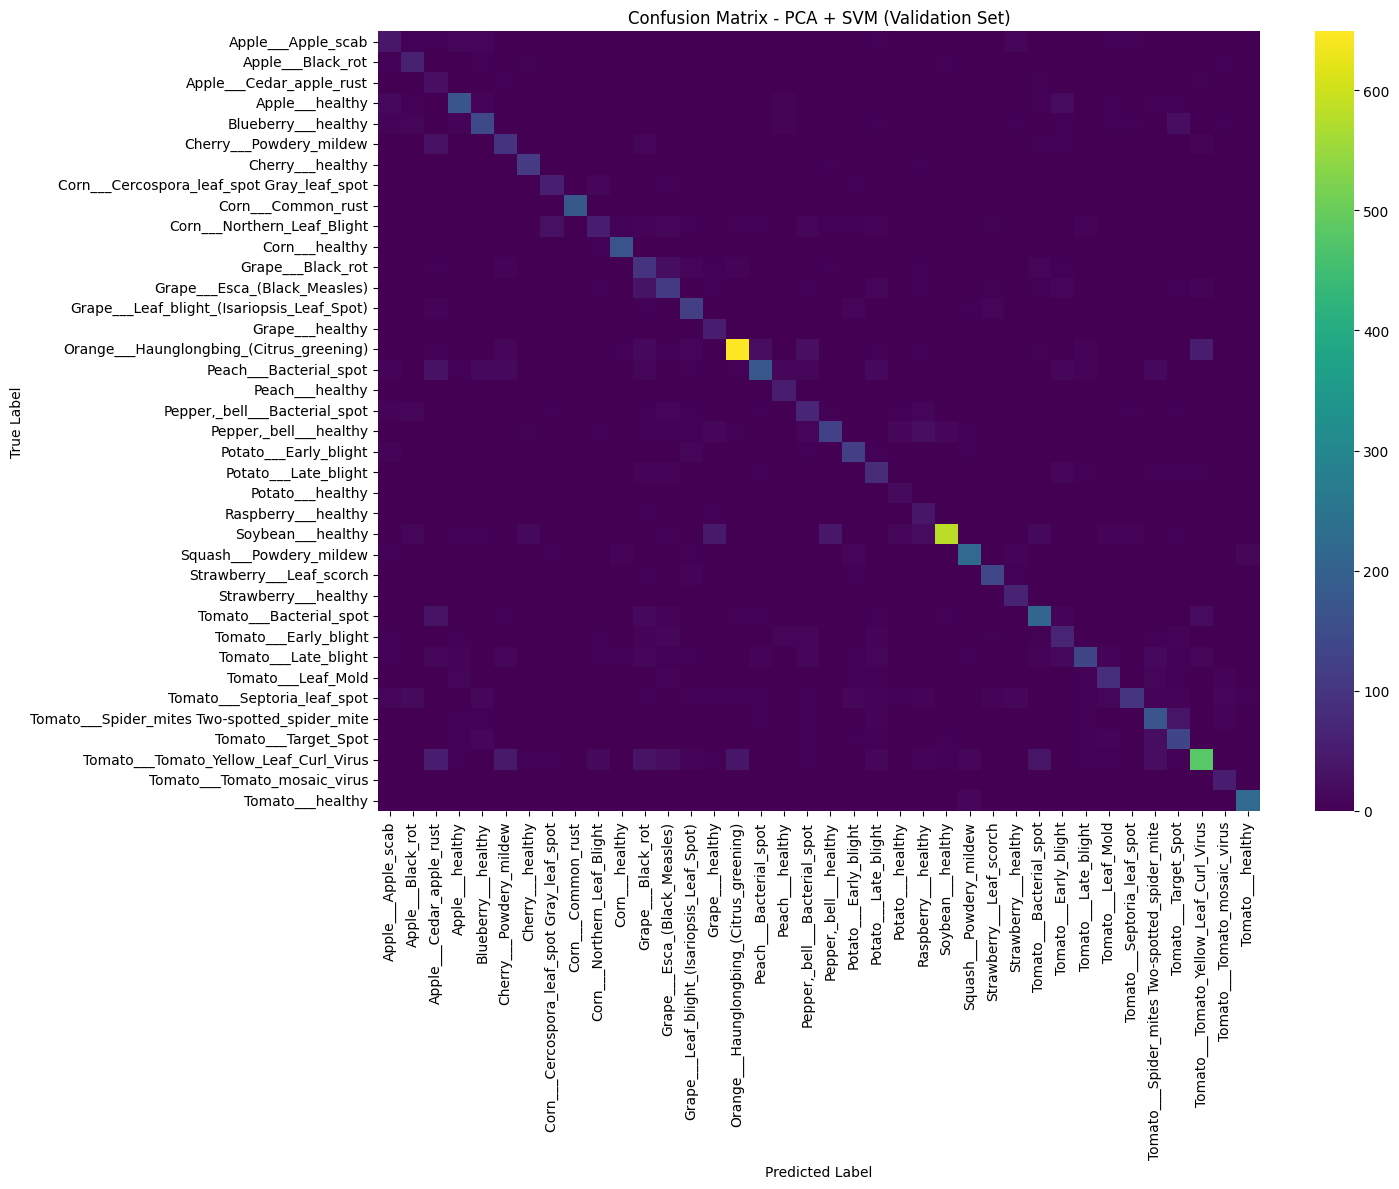

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📊 1️⃣ Classification report
report = classification_report(y_val, y_val_pred, target_names=le.classes_)
print("📄 Classification Report:\n")
print(report)

# 📈 2️⃣ Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(15, 12))
sns.heatmap(cm,
            annot=False,       # turn to True if you want numbers inside each cell
            cmap='viridis',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - PCA + SVM (Validation Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
# 4️⃣ Save model
joblib.dump(pca_svm, "pca_svm_fusion_model.pkl")

['pca_svm_fusion_model.pkl']

In [35]:
test_df = pd.read_parquet(r"C:\Users\hp\Downloads\crop_test_features.parquet")
test_df.head()

,label,mean_r,mean_g,mean_b,std_r,std_g,std_b,contrast,correlation,energy,homogeneity
0,Apple___Apple_scab,120.329803,135.235199,113.152206,74.652528,70.439579,83.908834,93.426777,0.990966,0.019890,0.296468
1,Apple___Apple_scab,119.447479,136.083176,112.797424,75.521789,61.555788,85.206433,218.429795,0.975800,0.014549,0.156364
2,Apple___Apple_scab,123.136963,131.548782,123.242188,71.070947,62.804712,79.906512,172.031250,0.980519,0.013113,0.161862
3,Apple___Apple_scab,126.904526,130.665237,127.111526,71.719717,67.149860,82.291223,178.694056,0.981638,0.012316,0.145340
4,Apple___Apple_scab,120.622681,134.949890,124.576843,76.320193,65.429008,82.172813,144.737806,0.985291,0.012232,0.144364


In [37]:
test_df.columns

Index(['label', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b',
       'contrast', 'correlation', 'energy', 'homogeneity'],
      dtype='object')

In [39]:
# Encode labels
le = LabelEncoder()
test_df['label_encoded'] = le.fit_transform(test_df['label'])


In [41]:
test_df.columns

Index(['label', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b',
       'contrast', 'correlation', 'energy', 'homogeneity', 'label_encoded'],
      dtype='object')

In [43]:
# Features and target
X_test = test_df.drop(['label', 'label_encoded'], axis=1)
y_test = test_df['label_encoded']

In [45]:
import joblib

# Load the trained SVM model
svm = joblib.load(r"C:\Users\hp\Downloads\pca_svm_fusion_model.pkl")
print("Model loaded successfully")


Model loaded successfully


In [47]:
y_test_pred = svm.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_test, y_test_pred)
print(f"Test data Accuracy: {acc*100:.2f}%")

Test data Accuracy: 66.57%


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n🔹 Macro Precision:", precision_score(y_test, y_test_pred, average='macro'))
print("🔹 Macro Recall:", recall_score(y_test, y_test_pred, average='macro'))
print("🔹 Macro F1-Score:", f1_score(y_test, y_test_pred, average='macro'))

print("\n🔹 Weighted Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("🔹 Weighted Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("🔹 Weighted F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))



🔹 Macro Precision: 0.6030535410283664
🔹 Macro Recall: 0.6737312752082569
🔹 Macro F1-Score: 0.6206669706172

🔹 Weighted Precision: 0.7019354799586093
🔹 Weighted Recall: 0.6657293067612178
🔹 Weighted F1-Score: 0.6731437241853135
